<a href="https://colab.research.google.com/github/jespimentel/acervo_vivo/blob/main/acervo_SISMP_2023_10_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabula-py
import pandas as pd
import sqlite3
import tabula
import matplotlib.pyplot as plt

In [ ]:
acervo = '/content/ConsultaAcervo.pdf' # Acervo vivo criminal do SIS MP Integrado
acervo_expirados = '/content/ConsultaProcedimentosExpirados.pdf' # IPs relatados em andamento
acervo_fora = '/content/ConsultaInqueritosForaPJ.pdf' # IPs fora da PJ

In [ ]:
tabelas_acervo = tabula.read_pdf(acervo, pages='all')
tabelas_acervo_fora = tabula.read_pdf(acervo_fora, pages='all')
tabelas_acervo_expirados = tabula.read_pdf(acervo_expirados, pages='all')

# Acervo

In [ ]:
tabela_acervo_consolidada =[]
for tabela in tabelas_acervo:
  tabela_acervo_consolidada.append(tabela)

tabela_acervo_consolidada = pd.concat(tabela_acervo_consolidada)
display(tabela_acervo_consolidada.sample(5))

,Tipo,N° MP,No TJ,UA,Cargo,Localização\rAtual,Última\rMovimentação,Unnamed: 0
2,IP,13.0723.0003242/2023-1,1504432-\r90.2023.8.26.0451,Promotoria de Justiça\rde Piracicaba,10o PROMOTOR DE\rJUSTIÇA DE\rPIRACICABA,02A V CRIM DE\rPIRACICABA,PRORROGAÇÃO\rDE PRAZO,NaN
10,MC,61.0723.0004637/2023-2,1508642-\r87.2023.8.26.0451,Promotoria de Justiça\rde Piracicaba,10o PROMOTOR DE\rJUSTIÇA DE\rPIRACICABA,02A V CRIM DE\rPIRACICABA,CIÊNCIA,NaN
15,IP,13.0723.0004520/2012-1,451.01.2009.00510\r2-9/000000-000,Promotoria de Justiça\rde Piracicaba,7o PROMOTOR DE\rJUSTIÇA DE\rPIRACICABA,03A V CRIM DE\rPIRACICABA,MANIFESTAÇÃO\rDIVERSA,NaN
18,IP,13.0723.0000267/2019-1,1502851-\r79.2019.8.26.0451,Promotoria de Justiça\rde Piracicaba,7o PROMOTOR DE\rJUSTIÇA DE\rPIRACICABA,03A V CRIM DE\rPIRACICABA,PRORROGAÇÃO\rDE PRAZO,NaN
8,IP,13.0723.0002440/2021-5,1502096-\r84.2021.8.26.0451,Promotoria de Justiça\rde Piracicaba,2o PROMOTOR DE\rJUSTIÇA DE\rPIRACICABA,V DO JÚRI E DE\rEXECUÇÕES\rCRIMINAIS DE\rPIRAC...,PRORROGAÇÃO\rDE PRAZO,NaN


In [ ]:
tabela_acervo_consolidada.columns

Index(['Tipo', 'N° MP', 'No TJ', 'UA', 'Cargo', 'Localização\rAtual',
       'Última\rMovimentação', 'Unnamed: 0'],
      dtype='object')

In [ ]:
# Limpeza dos dados
tabela_acervo_consolidada = tabela_acervo_consolidada.drop(columns='Unnamed: 0', axis=0)
tabela_acervo_consolidada = tabela_acervo_consolidada.dropna(subset=['N° MP'])
tabela_acervo_consolidada.columns = tabela_acervo_consolidada.columns.str.replace("\r", " ")
tabela_acervo_consolidada = tabela_acervo_consolidada.applymap(lambda x: x.replace("\r", " ") if isinstance(x, str) else x)
tabela_acervo_consolidada = tabela_acervo_consolidada.applymap(lambda x: x.replace("- ", "-") if isinstance(x, str) else x)
tabela_acervo_consolidada = tabela_acervo_consolidada.reset_index(drop=True)

In [ ]:
tabela_acervo_consolidada

,Tipo,N° MP,No TJ,UA,Cargo,Localização Atual,Última Movimentação
0,IP,13.0001.0002063/2019-7,1504098-37.2019.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,CIÊNCIA
1,IP,13.0001.0005671/2014-1,0044681-17.2014.8.26.0050,Promotoria de Justiça de Piracicaba,7o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO
2,IP,13.0001.0006065/2020-9,1523687-78.2020.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,PRORROGAÇÃO DE PRAZO
3,IP,13.0001.0009116/2018-3,0101828-59.2018.8.26.0050,Promotoria de Justiça de Piracicaba,4o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,DILIGÊNCIA
4,IP,13.0001.0030095/2020-5,1531484-08.2020.8.26.0050,Promotoria de Justiça de Piracicaba,17o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,PRORROGAÇÃO DE PRAZO
...,...,...,...,...,...,...,...
9152,MC,61.1101.0000230/2017-3,0000000796/2017,Promotoria de Justiça de Piracicaba,1o PROMOTOR DE JUSTIÇA AUXILIAR DE PIRACICABA,04A V CRIM DE PIRACICABA,CIÊNCIA
9153,PIC,94.0723.0000458/2020-4,0000864-48.2020.8.26.0451,Promotoria de Justiça de Piracicaba,11o PROMOTOR DE JUSTIÇA DE PIRACICABA,01A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA
9154,PIC,94.0723.0001920/2020-5,1008548-07.2020.8.26.0451,Promotoria de Justiça de Piracicaba,9o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia Seccional de Piracicaba,REQUISIÇÃO DE INSTAURAÇÃO DE TCO
9155,PIC,94.0723.0003758/2023-5,NaN,Promotoria de Justiça de Piracicaba,8o PROMOTOR DE JUSTIÇA DE PIRACICABA,Promotoria de Justiça de Piracicaba,CONCLUSOS


# Relatados

In [ ]:
tabela_acervo_expirados_consolidada =[]
for tabela in tabelas_acervo_expirados:
  tabela_acervo_expirados_consolidada.append(tabela)

tabela_acervo_expirados_consolidada = pd.concat(tabela_acervo_expirados_consolidada)
display(tabela_acervo_expirados_consolidada)

,Tipo,N° MP,N° TJ,Município do Fato
0,IP,13.0001.0005671/2014-1,+0044681172014826\r005000000,NaN
1,IP,13.0001.0009116/2018-3,+0101828592018826\r005000000,NaN
2,IP,13.0002.0005719/2016-4,+0047393092016826\r005000000,NaN
3,IP,13.0002.0007566/2017-5,+0077583182017826\r005000000,NaN
4,IP,13.0004.0001826/2021-7,+1508522542021826\r005000000,NaN
...,...,...,...,...
2,IP,13.1618.0000190/2022-1,+1522551752022826\r005000000,NaN
3,IPM,58.0580.0000138/2022-6,+0009684852022826\r045100000,NaN
4,IPM,58.0580.0002548/2020-1,+0006245032021826\r045100000,NaN
5,NaN,NaN,NaN,NaN


In [ ]:
# Limpeza dos dados
tabela_acervo_expirados_consolidada = tabela_acervo_expirados_consolidada.dropna(subset=['Tipo'])
tabela_acervo_expirados_consolidada = tabela_acervo_expirados_consolidada[['N° MP']].reset_index(drop=True)
tabela_acervo_expirados_consolidada

,N° MP
0,13.0001.0005671/2014-1
1,13.0001.0009116/2018-3
2,13.0002.0005719/2016-4
3,13.0002.0007566/2017-5
4,13.0004.0001826/2021-7
...,...
1311,13.0723.0030495/2020-2
1312,13.0723.0030515/2020-1
1313,13.1618.0000190/2022-1
1314,58.0580.0000138/2022-6


# IPs fora da PJ

In [ ]:
tabela_acervo_fora_consolidada =[]
for tabela in tabelas_acervo_fora:
  tabela_acervo_fora_consolidada.append(tabela)

tabela_acervo_fora_consolidada = pd.concat(tabela_acervo_fora_consolidada)
display(tabela_acervo_fora_consolidada)

,Tipo,N° MP,No do Inquérito na Delegacia,No TJ,Última Providência,Dias
0,IP,13.0723.0003986/2022-3,NaN,1502179-66.2022.8.26.0451,PRORROGAÇÃO DE PRAZO,1.0
1,IP,13.0723.0003767/2023-2,NaN,1506398-88.2023.8.26.0451,PRORROGAÇÃO DE PRAZO,1.0
2,IP,13.0723.0000003/2023-3,NaN,1532305-02.2022.8.26.0451,CIÊNCIA,1.0
3,IP,13.0723.0005514/2023-9,NaN,1504532-45.2023.8.26.0451,DESIGNAÇÃO DE AUDIÊNCIA\rPRELIMINAR,1.0
4,IP,13.0723.0005564/2023-7,NaN,1507492-71.2023.8.26.0451,MANIFESTAÇÃO DIVERSA,1.0
...,...,...,...,...,...,...
9,IP,13.0723.0000530/2011-8,238/2011,451.01.2011.034089-2/000000-000,PRORROGAÇÃO DE PRAZO,4323.0
10,IP,13.0723.0000535/2011-1,237/2011,451.01.2011.001656-5/000000-000,PRORROGAÇÃO DE PRAZO,4323.0
11,IP,13.0723.0000455/2011-0,315/2011,451.01.2011.008940-7/000000-000,CIÊNCIA,4324.0
12,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Limpeza dos dados
tabela_acervo_fora_consolidada = tabela_acervo_fora_consolidada.dropna(subset=['Tipo'])
tabela_acervo_fora_consolidada = tabela_acervo_fora_consolidada[['N° MP', 'Última Providência', 'Dias']].reset_index(drop=True)
tabela_acervo_fora_consolidada

,N° MP,Última Providência,Dias
0,13.0723.0003986/2022-3,PRORROGAÇÃO DE PRAZO,1.0
1,13.0723.0003767/2023-2,PRORROGAÇÃO DE PRAZO,1.0
2,13.0723.0000003/2023-3,CIÊNCIA,1.0
3,13.0723.0005514/2023-9,DESIGNAÇÃO DE AUDIÊNCIA\rPRELIMINAR,1.0
4,13.0723.0005564/2023-7,MANIFESTAÇÃO DIVERSA,1.0
...,...,...,...
5303,13.0723.0000492/2011-1,CIÊNCIA,4323.0
5304,13.0723.0000525/2011-7,PRORROGAÇÃO DE PRAZO,4323.0
5305,13.0723.0000530/2011-8,PRORROGAÇÃO DE PRAZO,4323.0
5306,13.0723.0000535/2011-1,PRORROGAÇÃO DE PRAZO,4323.0


In [ ]:
# Gravando no SQLite
conn = sqlite3.connect('acervo_vivo.db')

tabela_acervo_consolidada.to_sql('acervo', conn, index=False, if_exists='replace')
tabela_acervo_expirados_consolidada.to_sql('relatados', conn, index=False, if_exists='replace')
tabela_acervo_fora_consolidada.to_sql('fora', conn, index=False, if_exists='replace')

conn.close()

# Lendo SQLite3

In [ ]:
import pandas as pd
import sqlite3

db = '/content/acervo_vivo.db'

con = sqlite3.connect(db)
query = "SELECT * FROM acervo"

df = pd.read_sql_query(query, con)
con.close()

display(df.head())

,Tipo,N° MP,No TJ,UA,Cargo,Localização Atual,Última Movimentação
0,IP,13.0001.0002063/2019-7,1504098-37.2019.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,CIÊNCIA
1,IP,13.0001.0005671/2014-1,0044681-17.2014.8.26.0050,Promotoria de Justiça de Piracicaba,7o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO
2,IP,13.0001.0006065/2020-9,1523687-78.2020.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,PRORROGAÇÃO DE PRAZO
3,IP,13.0001.0009116/2018-3,0101828-59.2018.8.26.0050,Promotoria de Justiça de Piracicaba,4o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,DILIGÊNCIA
4,IP,13.0001.0030095/2020-5,1531484-08.2020.8.26.0050,Promotoria de Justiça de Piracicaba,17o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,PRORROGAÇÃO DE PRAZO


In [ ]:
query = """
SELECT *
FROM relatados
"""
con = sqlite3.connect(db)
df_relatados = pd.read_sql_query(query, con)
con.close()

df_relatados.sample(5)

,N° MP
233,13.0723.0000887/2015-5
399,13.0723.0001592/2020-5
343,13.0723.0001358/2019-8
590,13.0723.0002399/2021-6
163,13.0723.0000565/2011-1


In [ ]:
df['Relatado?'] = df['N° MP'].isin(df_relatados['N° MP']).map({True: 'sim', False: 'não'})
display(df)

,Tipo,N° MP,No TJ,UA,Cargo,Localização Atual,Última Movimentação,Relatado?
0,IP,13.0001.0002063/2019-7,1504098-37.2019.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,CIÊNCIA,não
1,IP,13.0001.0005671/2014-1,0044681-17.2014.8.26.0050,Promotoria de Justiça de Piracicaba,7o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,sim
2,IP,13.0001.0006065/2020-9,1523687-78.2020.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,PRORROGAÇÃO DE PRAZO,não
3,IP,13.0001.0009116/2018-3,0101828-59.2018.8.26.0050,Promotoria de Justiça de Piracicaba,4o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,DILIGÊNCIA,sim
4,IP,13.0001.0030095/2020-5,1531484-08.2020.8.26.0050,Promotoria de Justiça de Piracicaba,17o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,PRORROGAÇÃO DE PRAZO,não
...,...,...,...,...,...,...,...,...
9152,MC,61.1101.0000230/2017-3,0000000796/2017,Promotoria de Justiça de Piracicaba,1o PROMOTOR DE JUSTIÇA AUXILIAR DE PIRACICABA,04A V CRIM DE PIRACICABA,CIÊNCIA,não
9153,PIC,94.0723.0000458/2020-4,0000864-48.2020.8.26.0451,Promotoria de Justiça de Piracicaba,11o PROMOTOR DE JUSTIÇA DE PIRACICABA,01A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
9154,PIC,94.0723.0001920/2020-5,1008548-07.2020.8.26.0451,Promotoria de Justiça de Piracicaba,9o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia Seccional de Piracicaba,REQUISIÇÃO DE INSTAURAÇÃO DE TCO,não
9155,PIC,94.0723.0003758/2023-5,None,Promotoria de Justiça de Piracicaba,8o PROMOTOR DE JUSTIÇA DE PIRACICABA,Promotoria de Justiça de Piracicaba,CONCLUSOS,não


In [ ]:
criterio = (df['Tipo'] == 'IP') | (df['Tipo'] == 'TCO')
resumo = df[criterio].groupby('Cargo')[['Cargo', 'Relatado?']].value_counts()
resumo

Cargo                                          Relatado?
10o PROMOTOR DE JUSTIÇA DE PIRACICABA          não           633
                                               sim           142
11o PROMOTOR DE JUSTIÇA DE PIRACICABA          não           342
                                               sim            98
12o PROMOTOR DE JUSTIÇA DE PIRACICABA          não             2
13o PROMOTOR DE JUSTIÇA DE PIRACICABA          não          1021
                                               sim            13
14o PROMOTOR DE JUSTIÇA DE PIRACICABA          não            16
                                               sim             7
15o PROMOTOR DE JUSTIÇA DE PIRACICABA          não            75
16o PROMOTOR DE JUSTIÇA DE PIRACICABA          não             1
17o PROMOTOR DE JUSTIÇA DE PIRACICABA          não           475
                                               sim           162
1o PROMOTOR DE JUSTIÇA AUXILIAR DE PIRACICABA  não           393
                                 

In [ ]:
resumo = resumo.unstack(fill_value=0)
resumo['Total'] = resumo['sim'] + resumo['não']
resumo = resumo.sort_values(by='Total', ascending=False)
resumo = resumo.drop(columns=['Total'])
resumo

Relatado?,não,sim
Cargo,,
13o PROMOTOR DE JUSTIÇA DE PIRACICABA,1021,13
7o PROMOTOR DE JUSTIÇA DE PIRACICABA,573,366
10o PROMOTOR DE JUSTIÇA DE PIRACICABA,633,142
17o PROMOTOR DE JUSTIÇA DE PIRACICABA,475,162
4o PROMOTOR DE JUSTIÇA DE PIRACICABA,469,144
6o PROMOTOR DE JUSTIÇA DE PIRACICABA,431,120
1o PROMOTOR DE JUSTIÇA AUXILIAR DE PIRACICABA,393,74
11o PROMOTOR DE JUSTIÇA DE PIRACICABA,342,98
9o PROMOTOR DE JUSTIÇA DE PIRACICABA,360,60


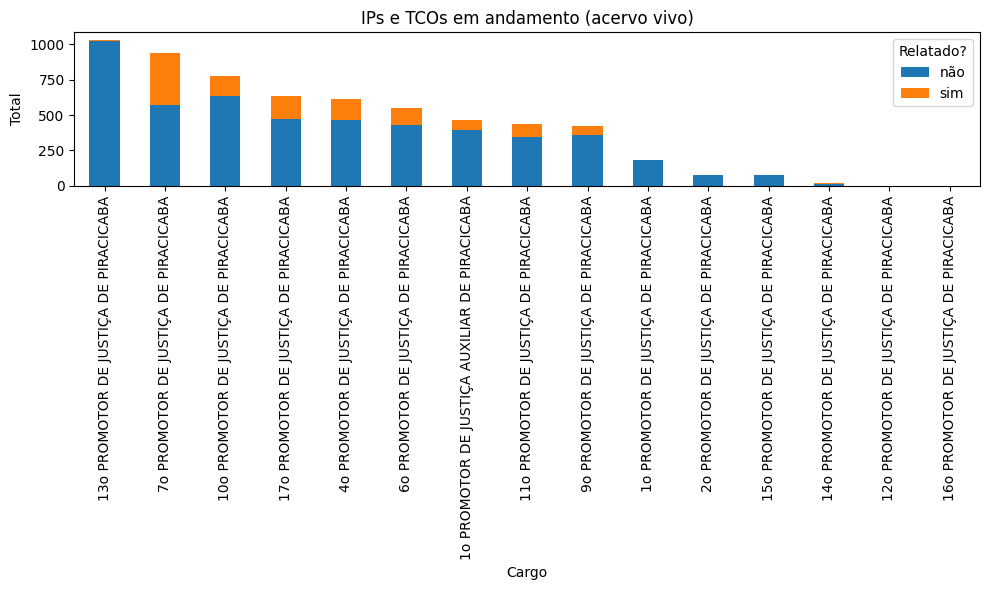

In [ ]:
# Gráfico de barras empilhado
ax = resumo.plot(kind='bar', stacked=True, figsize=(10, 6))

# Rótulos e título
plt.xlabel('Cargo')
plt.ylabel('Total')
plt.title('IPs e TCOs em andamento (acervo vivo)')

# Mostrar o gráfico
plt.legend(title='Relatado?')
plt.tight_layout()
plt.show()

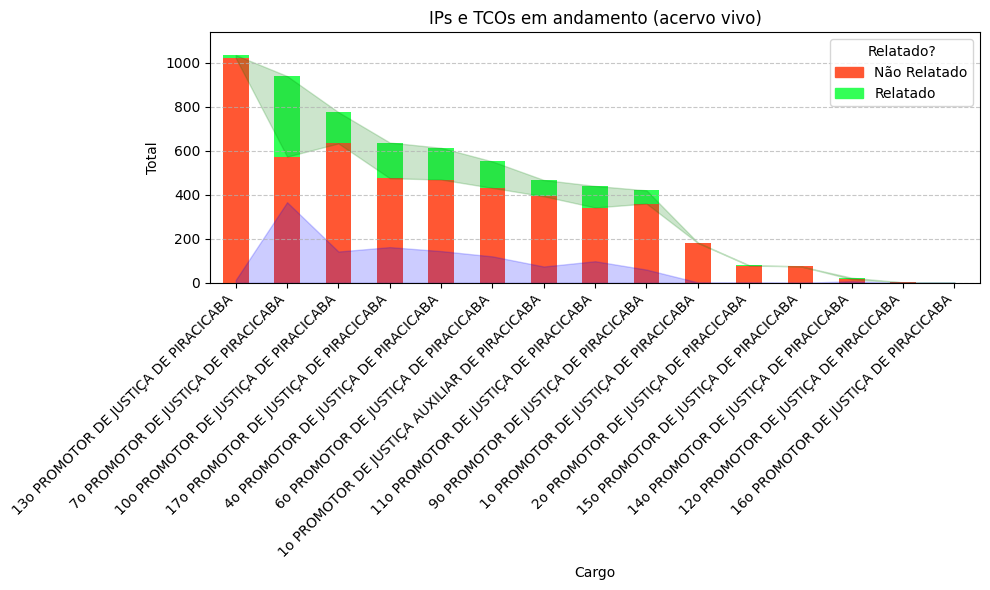

In [ ]:
# Definir cores para as barras empilhadas
cores = ['#FF5733', '#33FF57']

# Criar um gráfico de barras empilhado
ax = resumo.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)

# Configurar rótulos e título
plt.xlabel('Cargo')
plt.ylabel('Total')
plt.title('IPs e TCOs em andamento (acervo vivo)')

# Adicionar sombreamento para destacar as categorias
ax.fill_between(resumo.index, 0, resumo['sim'], alpha=0.2, color='blue', label='Relatado')
ax.fill_between(resumo.index, resumo['não'], resumo.sum(axis=1), alpha=0.2, color='green', label='Não Relatado')

# Ajustar as margens
plt.margins(0.1, 0.1)  # 10% de margem em ambos os lados

# Adicionar grade
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Melhorar os rótulos do eixo X (rotacionar e alinhar à direita)
plt.xticks(rotation=45, ha='right')

# Mostrar a legenda com cores correspondentes
legend_labels = ['Não Relatado', 'Relatado']
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in cores]
ax.legend(legend_colors, legend_labels, title='Relatado?', loc='upper right')

# Mostrar o gráfico e salvar a figura
plt.tight_layout() # não deixa "estourar"
plt.savefig('gráfico.jpg')
plt.show()


# Procedimentos mais antigos por cargo

In [ ]:
df['Ano'] = df['N° MP'].str.slice(16,20)
df['Seq'] = df['N° MP'].str.slice(8,15)
df

,Tipo,N° MP,No TJ,UA,Cargo,Localização Atual,Última Movimentação,Relatado?,Ano,Seq
0,IP,13.0001.0002063/2019-7,1504098-37.2019.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,CIÊNCIA,não,2019,0002063
1,IP,13.0001.0005671/2014-1,0044681-17.2014.8.26.0050,Promotoria de Justiça de Piracicaba,7o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,sim,2014,0005671
2,IP,13.0001.0006065/2020-9,1523687-78.2020.8.26.0050,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,PRORROGAÇÃO DE PRAZO,não,2020,0006065
3,IP,13.0001.0009116/2018-3,0101828-59.2018.8.26.0050,Promotoria de Justiça de Piracicaba,4o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 4,DILIGÊNCIA,sim,2018,0009116
4,IP,13.0001.0030095/2020-5,1531484-08.2020.8.26.0050,Promotoria de Justiça de Piracicaba,17o PROMOTOR DE JUSTIÇA DE PIRACICABA,DIPO 3,PRORROGAÇÃO DE PRAZO,não,2020,0030095
...,...,...,...,...,...,...,...,...,...,...
9152,MC,61.1101.0000230/2017-3,0000000796/2017,Promotoria de Justiça de Piracicaba,1o PROMOTOR DE JUSTIÇA AUXILIAR DE PIRACICABA,04A V CRIM DE PIRACICABA,CIÊNCIA,não,2017,0000230
9153,PIC,94.0723.0000458/2020-4,0000864-48.2020.8.26.0451,Promotoria de Justiça de Piracicaba,11o PROMOTOR DE JUSTIÇA DE PIRACICABA,01A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não,2020,0000458
9154,PIC,94.0723.0001920/2020-5,1008548-07.2020.8.26.0451,Promotoria de Justiça de Piracicaba,9o PROMOTOR DE JUSTIÇA DE PIRACICABA,Delegacia Seccional de Piracicaba,REQUISIÇÃO DE INSTAURAÇÃO DE TCO,não,2020,0001920
9155,PIC,94.0723.0003758/2023-5,None,Promotoria de Justiça de Piracicaba,8o PROMOTOR DE JUSTIÇA DE PIRACICABA,Promotoria de Justiça de Piracicaba,CONCLUSOS,não,2023,0003758


In [ ]:
cargos = df['Cargo'].unique()
df_atencao = pd.DataFrame()

for cargo in cargos:
  df_temp = df[df['Cargo'] == cargo]
  df_temp = df_temp.sort_values(by=['Ano', 'Seq'], ascending=[True, True])
  df_temp = df_temp.head(30)
  df_atencao = pd.concat([df_atencao, df_temp], ignore_index=True)

df_atencao

,Tipo,N° MP,No TJ,UA,Cargo,Localização Atual,Última Movimentação,Relatado?,Ano,Seq
0,IP,13.0723.0000392/2011-2,451.01.2011.03376 4-8/000000-000,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,02A V CRIM DE PIRACICABA,CIÊNCIA,sim,2011,0000392
1,MC,61.0723.0000394/2011-3,451.01.2011.03376 1-0/000000-000,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não,2011,0000394
2,IP,13.0723.0000398/2011-0,451.01.2007.03744 1-8/000000-000,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não,2011,0000398
3,MC,61.0723.0000425/2011-1,451.01.2011.02911 2-3/000000-000,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não,2011,0000425
4,IP,13.0723.0000430/2011-0,451.01.2011.00145 3-8/000000-000,Promotoria de Justiça de Piracicaba,10o PROMOTOR DE JUSTIÇA DE PIRACICABA,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim,2011,0000430
...,...,...,...,...,...,...,...,...,...,...
385,IP,13.0723.0002774/2023-5,1502905-40.2022.8.26.0451,Promotoria de Justiça de Piracicaba,12o PROMOTOR DE JUSTIÇA DE PIRACICABA,04A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não,2023,0002774
386,TCO,17.0723.0002783/2023-6,1507208-97.2022.8.26.0451,Promotoria de Justiça de Piracicaba,12o PROMOTOR DE JUSTIÇA DE PIRACICABA,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não,2023,0002783
387,PIC,94.0723.0003758/2023-5,None,Promotoria de Justiça de Piracicaba,8o PROMOTOR DE JUSTIÇA DE PIRACICABA,Promotoria de Justiça de Piracicaba,CONCLUSOS,não,2023,0003758
388,NF,38.0723.0003871/2023-3,None,Promotoria de Justiça de Piracicaba,8o PROMOTOR DE JUSTIÇA DE PIRACICABA,Promotoria de Justiça de Piracicaba,MANIFESTAÇÃO DIVERSA,não,2023,0003871


In [ ]:
for cargo in cargos:
  print(cargo)
  df_temp = df_atencao[df_atencao['Cargo'] == cargo][['N° MP', 'No TJ', 'Localização Atual', 'Última Movimentação', 'Relatado?']]
  display(df_temp.reset_index(drop=True))
  print('----------------------------------------')

10o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0000392/2011-2,451.01.2011.03376 4-8/000000-000,02A V CRIM DE PIRACICABA,CIÊNCIA,sim
1,61.0723.0000394/2011-3,451.01.2011.03376 1-0/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
2,13.0723.0000398/2011-0,451.01.2007.03744 1-8/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
3,61.0723.0000425/2011-1,451.01.2011.02911 2-3/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
4,13.0723.0000430/2011-0,451.01.2011.00145 3-8/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
5,13.0723.0000435/2011-2,451.01.2011.02150 4-0/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
6,13.0723.0000438/2011-6,451.01.2010.03127 0-9/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
7,13.0723.0000442/2011-2,451.01.2011.03146 3-0/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
8,24.0723.0000448/2011-0,451.01.2011.03401 6-9/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
9,61.0723.0000463/2011-6,451.01.2011.03213 7-2/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não


----------------------------------------
7o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0000563/2011-2,0000001945/2011,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,sim
1,61.0723.0000828/2011-7,451.01.2011.03525 2-7/000000-000,03A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
2,13.0723.0000003/2012-8,0000001528/2011,03A V CIV DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
3,24.0723.0000048/2012-5,0000000007/2012,03A V CRIM DE PIRACICABA,AGUARDAR OS AUTOS PRINCIPAIS,não
4,24.0723.0000066/2012-3,0000000005/2012,03A V CRIM DE PIRACICABA,AGUARDAR OS AUTOS PRINCIPAIS,não
5,24.0723.0000067/2012-8,0000000008/2012,03A V CRIM DE PIRACICABA,AGUARDAR OS AUTOS PRINCIPAIS,não
6,24.0723.0000085/2012-6,0000000028/2012,03A V CRIM DE PIRACICABA,AGUARDAR OS AUTOS PRINCIPAIS,não
7,24.0723.0000086/2012-1,0000000019/2012,03A V CRIM DE PIRACICABA,AGUARDAR OS AUTOS PRINCIPAIS,não
8,13.0723.0000714/2012-3,0000000575/2011,03A V CRIM DE PIRACICABA,DILIGÊNCIA,sim
9,13.0723.0000951/2012-1,0000001676/2009,03A V CRIM DE PIRACICABA,CIÊNCIA,sim


----------------------------------------
4o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,61.0723.0000454/2011-7,451.01.2011.00894 0-7/000000-000,03A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
1,13.0723.0000455/2011-0,451.01.2011.00894 0-7/000000-000,03A V CRIM DE PIRACICABA,CIÊNCIA,sim
2,61.0723.0000457/2011-1,451.01.2011.02647 4-8/000000-000,03A V CRIM DE PIRACICABA,CIÊNCIA,não
3,13.0723.0000492/2011-1,451.01.2010.03420 4-0/000000-000,03A V CRIM DE PIRACICABA,CIÊNCIA,sim
4,61.0723.0000506/2011-6,451.01.2011.02876 7-7/000000-000,03A V CRIM DE PIRACICABA,CIÊNCIA,não
5,13.0723.0000026/2012-9,451.01.2011.02013 2-1/000000-000,03A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
6,13.0723.0000075/2012-2,451.01.2011.01851 0-4/000000-000,03A V CRIM DE PIRACICABA,CIÊNCIA,sim
7,13.0723.0000109/2012-3,451.01.2005.03138 8-8/000000-000,03A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,sim
8,13.0723.0000119/2012-7,451.01.2011.02582 7-0/000000-000,03A V CRIM DE PIRACICABA,CIÊNCIA,não
9,13.0723.0000136/2012-1,451.01.2010.02783 5-1/000000-000,03A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não


----------------------------------------
17o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0005685/2015-6,0017354-24.2015.8.26.0451,Delegacia de Polícia do 2o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
1,13.0723.0005735/2015-6,0017618-41.2015.8.26.0451,Delegacia de Polícia do 5o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
2,13.0723.0000446/2016-1,0018290-49.2015.8.26.0451,Delegacia de Polícia do 2o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
3,13.0723.0000672/2016-1,0000811-09.2016.8.26.0451,Delegacia de Polícia do 6o Distrito Policial d...,DILIGÊNCIA,não
4,13.0723.0001848/2016-1,0005103-37.2016.8.26.0451,17o PROMOTOR DE JUSTIÇA DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
5,13.0723.0002463/2016-0,0007077-12.2016.8.26.0451,Delegacia de Polícia do 6o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
6,13.0723.0002596/2016-2,0007782-10.2016.8.26.0451,Delegacia de Polícia do 4o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
7,13.0723.0002651/2016-3,0008184-91.2016.8.26.0451,Delegacia de Polícia do 7o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
8,13.0723.0002656/2016-6,0008185-76.2016.8.26.0451,Delegacia de Polícia do 7o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
9,13.0723.0004250/2016-1,0012573-22.2016.8.26.0451,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não


----------------------------------------
6o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,17.0723.0000380/2011-1,451.01.2011.03312 2-0/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
1,17.0723.0000382/2011-1,451.01.2011.03325 7-0/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
2,17.0723.0000383/2011-5,130.01.2010.00291 6-0/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
3,17.0723.0000386/2011-9,1300120-11.0007.0.40.0000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
4,17.0723.0000395/2011-8,451.01.2011.00676 3-2/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
5,61.0723.0000434/2011-0,20202011,01A V CRIM DE PIRACICABA,CIÊNCIA DO DEFERIMENTO DO PEDIDO,não
6,24.0723.0000439/2011-1,451.01.2011.03384 3-2/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
7,61.0723.0000440/2011-5,451.01.2011.02684 5-8/000000-000,01A V CRIM DE PIRACICABA,COTA,não
8,13.0723.0000522/2011-3,451.01.2011.02736 8-6/000000-000,01A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
9,13.0723.0000565/2011-1,451.01.2011.03442 6-0/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,sim


----------------------------------------
11o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0000552/2011-4,451.01.2010.01077 6-0/000000-000,01A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
1,61.0723.0000631/2011-2,451.01.2011.02923 1-2/000000-000,01A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
2,24.0723.0000632/2011-5,0000002584/2011,01A V CRIM DE PIRACICABA,CIÊNCIA,não
3,61.0723.0000636/2011-5,451.01.2011.03410 8-5/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
4,24.0723.0000638/2011-2,451.01.2011.03355 5-8/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
5,24.0723.0000639/2011-7,451.01.2011.03432 2-5/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
6,24.0723.0000812/2011-4,451.01.2011.03483 5-0/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
7,24.0723.0000825/2011-1,451.01.2011.03479 7-2/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
8,24.0723.0000868/2011-0,451.01.2011.03512 9-0/000000-000,01A V CRIM DE PIRACICABA,CIÊNCIA,não
9,24.0723.0000896/2011-1,451.01.2011.03566 1-6/000000-000,01A V CRIM DE PIRACICABA,AGUARDAR OS AUTOS PRINCIPAIS,não


----------------------------------------
9o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0000389/2011-1,451.01.2001.03372 9-7/000000-000,02A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
1,13.0723.0000410/2011-2,451.01.2011.02649 0-4/000000-000,Promotoria de Justiça de Piracicaba,Nenhuma Movimentação Encontrada,não
2,13.0723.0000417/2011-4,451.01.2011.02517 2-3/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
3,13.0723.0000428/2011-2,451.01.2009.01615 1-6/000000-000,02A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,sim
4,13.0723.0000449/2011-4,451.01.2011.03379 8-0/000000-000,02A V CRIM DE PIRACICABA,CIÊNCIA,não
5,13.0723.0000503/2011-1,451.01.2011.03408 4-9/000000-000,Promotoria de Justiça de Piracicaba,Nenhuma Movimentação Encontrada,não
6,13.0723.0000577/2011-4,451.01.2011.02347 1-3/000000-000,02A V CRIM DE PIRACICABA,CIÊNCIA,não
7,13.0723.0000650/2011-3,451.01.2011.03472 8-0/000000-000,Promotoria de Justiça de Piracicaba,Nenhuma Movimentação Encontrada,sim
8,13.0723.0000684/2011-2,451.01.2011.01870 0-0/000000-000,02A V CRIM DE PIRACICABA,CIÊNCIA,não
9,24.0723.0000777/2011-1,451.01.2011.03499 2-8/000000-000,02A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não


----------------------------------------
1o PROMOTOR DE JUSTIÇA AUXILIAR DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0000127/2014-8,3000301-47.2013.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
1,17.0723.0004216/2014-9,0006266-23.2014.8.26.0451,04A V CRIM DE PIRACICABA,CIÊNCIA,não
2,13.0723.0004719/2014-1,None,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
3,13.0003.0012588/2014-1,0094125-19.2014.8.26.0050,Delegacia de Polícia do 1o Distrito Policial d...,PRORROGAÇÃO DE PRAZO,não
4,61.0410.0000889/2015-5,0001852-59.2015.8.26.0511,V DE RIO DAS PEDRAS,MANIFESTAÇÃO DIVERSA,não
5,61.0723.0005619/2015-1,0017247-77.2015.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
6,13.0723.0005621/2015-6,0005546-85.2016.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
7,61.0723.0000130/2016-8,0000421-39.2016.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
8,61.0723.0000224/2016-1,0000604-10.2016.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
9,13.0723.0000342/2016-5,0000145-08.2016.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não


----------------------------------------
15o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0002099/2016-5,0005677-60.2016.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
1,13.0723.0003621/2016-0,0010568-27.2016.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
2,13.0723.0002688/2017-4,0007895-27.2017.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
3,13.0723.0004998/2017-7,0016073-62.2017.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
4,13.0723.0001987/2018-5,0009851-44.2018.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
5,13.0723.0004002/2018-1,1534207-29.2018.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
6,13.0723.0004253/2018-1,1502960-93.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
7,13.0723.0000863/2019-2,1502500-09.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
8,13.0723.0002561/2019-3,1506248-49.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
9,13.0723.0000356/2020-5,1510451-54.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não


----------------------------------------
2o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0002246/2018-6,0011017-14.2018.8.26.0451,Delegacia de Polícia de Investigações Gerais d...,PRORROGAÇÃO DE PRAZO,não
1,13.0723.0000122/2019-6,1538428-55.2018.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
2,13.0723.0001077/2019-6,1502812-82.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
3,13.0723.0001602/2019-7,1503002-45.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
4,13.0723.0001849/2019-0,1503989-81.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
5,13.0723.0002275/2019-1,1505657-87.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
6,13.0723.0003980/2019-6,1508258-66.2019.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,DILIGÊNCIA,não
7,13.0723.0001769/2020-2,1510517-97.2020.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
8,13.0723.0002235/2020-0,1525916-69.2020.8.26.0451,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
9,58.0580.0002548/2020-1,0003485-36.2020.9.26.0030,V DO JÚRI E DE EXECUÇÕES CRIMINAIS DE PIRACICABA,COTA,sim


----------------------------------------
13o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,17.0723.0000580/2011-8,451.01.2009.03575 7-7/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
1,17.0723.0000614/2011-9,451.01.2011.01745 2-4/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,DILIGÊNCIA,não
2,17.0723.0000624/2011-2,451.01.2011.01844 1-3/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
3,17.0723.0000627/2011-6,451.01.2011.01843 0-7/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não
4,17.0723.0000689/2011-7,451.01.2011.00363 5-6/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
5,17.0723.0000717/2011-1,451.01.2011.01868 3-2/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
6,17.0723.0000789/2011-5,451.01.2010.01009 5-2/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
7,17.0723.0000796/2011-5,451.01.2011.01919 9-5/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
8,17.0723.0000858/2011-8,451.01.2011.01919 3-9/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,DILIGÊNCIA,não
9,17.0723.0000860/2011-5,451.01.2011.01856 9-7/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,DILIGÊNCIA,não


----------------------------------------
14o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0005455/2016-7,0014292-39.2016.8.26.0451,02A V CRIM DE PIRACICABA,ACORDO DE NÃO PERSECUÇÃO PENAL,não
1,13.0723.0001413/2017-2,0002966-48.2017.8.26.0451,Promotoria de Justiça de Piracicaba,DILIGÊNCIA,não
2,13.0723.0030178/2020-4,1509593-86.2020.8.26.0451,02A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
3,13.0723.0000200/2021-0,1543318-66.2020.8.26.0451,04A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
4,13.0723.0004607/2021-3,1503971-89.2021.8.26.0451,04A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
5,13.0723.0001722/2022-2,1503318-87.2021.8.26.0451,04A V CRIM DE PIRACICABA,ACORDO DE NÃO PERSECUÇÃO PENAL,sim
6,61.0723.0002710/2023-7,1500152-54.2022.8.26.0599,01A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
7,13.0723.0002711/2023-0,1500573-03.2022.8.26.0451,01A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
8,13.0723.0002715/2023-8,1501122-13.2022.8.26.0451,01A V CRIM DE PIRACICABA,ACORDO DE NÃO PERSECUÇÃO PENAL,sim
9,13.0723.0002716/2023-2,1501140-34.2022.8.26.0451,03A V CRIM DE PIRACICABA,DILIGÊNCIA,sim


----------------------------------------
1o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,17.0723.0000636/2012-3,451.01.2011.03215 1-3/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
1,17.0723.0001399/2012-1,451.01.2011.02960 9-1/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
2,13.0723.0002017/2012-4,451.01.2012.00956 9-4/000000-000,02A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
3,17.0723.0004147/2012-0,451.01.2012.00088 6-8/000000-000,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
4,17.0723.0005578/2013-3,0004958-83.2013.8.26.0451,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
5,17.0723.0005797/2013-2,0006480-48.2013.8.26.0451,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
6,17.0723.0006353/2013-4,0008313-04.2013.8.26.0451,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,DILIGÊNCIA,não
7,17.0723.0000919/2014-1,3002581-88.2013.8.26.0451,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,MANIFESTAÇÃO DIVERSA,não
8,13.0723.0001310/2015-4,0011835-05.2014.8.26.0451,03A V CRIM DE PIRACICABA,MANIFESTAÇÃO DIVERSA,sim
9,17.0723.0002128/2015-7,3015938-38.2013.8.26.0451,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,CIÊNCIA,não


----------------------------------------
16o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0001904/2019-1,1503843-40.2019.8.26.0451,V DA INFÂNCIA E JUVENTUDE DE PIRACICABA,CIÊNCIA,não


----------------------------------------
12o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,13.0723.0002774/2023-5,1502905-40.2022.8.26.0451,04A V CRIM DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não
1,17.0723.0002783/2023-6,1507208-97.2022.8.26.0451,JUIZADO ESPECIAL CÍVEL E CRIMINAL DE PIRACICABA,PRORROGAÇÃO DE PRAZO,não


----------------------------------------
8o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,94.0723.0003758/2023-5,None,Promotoria de Justiça de Piracicaba,CONCLUSOS,não
1,38.0723.0003871/2023-3,None,Promotoria de Justiça de Piracicaba,MANIFESTAÇÃO DIVERSA,não


----------------------------------------
5o PROMOTOR DE JUSTIÇA DE PIRACICABA


,N° MP,No TJ,Localização Atual,Última Movimentação,Relatado?
0,38.0723.0004994/2023-0,None,Promotoria de Justiça de Piracicaba,Nenhuma Movimentação Encontrada,não


----------------------------------------
